In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit=pd.read_csv("creditcard.csv")

In [3]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#class  =0 represents a legit transacation
# class  =1 represents fraud transaction

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
#highly unbalanced dataset,, needs preprocessing

In [9]:
legit_data=credit[credit.Class==0]
fraud_data=credit[credit.Class==1]

In [10]:
print(legit_data.shape)
print(fraud_data.shape)

(284315, 31)
(492, 31)


In [11]:
legit_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
credit.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<Axes: xlabel='Class', ylabel='count'>

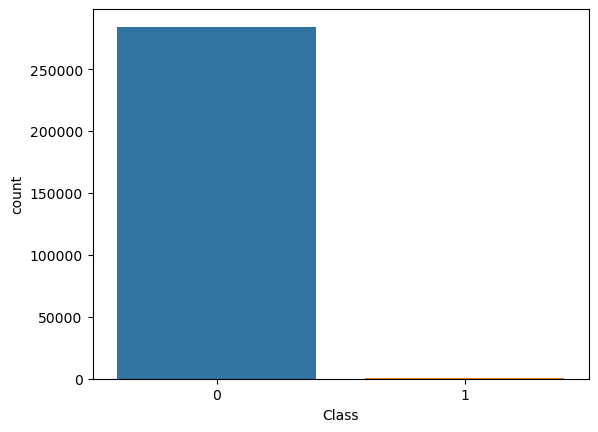

In [14]:
sns.countplot(x=credit.Class)

In [15]:
#the data is unbalanced and requires under sampling 

credit.Class.value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [16]:
legit_data=credit[credit["Class"]==0]
fraud_data=credit[credit["Class"]==1]

sample_legit=legit_data.sample(n=500)

In [17]:
df=pd.concat([sample_legit,fraud_data],axis=0)

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
194930,130827.0,-2.685813,-3.715599,0.017651,-1.613483,1.196464,0.671076,-0.128958,0.388722,-0.493909,...,0.093469,-0.039226,1.047892,-1.678213,-1.066273,-0.692661,0.064437,0.614420,420.35,0
181107,124826.0,1.960554,-2.077936,-0.953356,-1.944004,-0.751701,1.794641,-1.826524,0.571698,-1.049695,...,0.170383,0.778080,0.158285,-0.967214,-0.510444,0.008636,0.057802,-0.044312,115.00,0
146507,87736.0,-3.174988,2.565829,-1.166506,-2.662460,-0.563333,-1.758946,0.158992,1.060015,0.846993,...,-0.370509,-0.933422,0.196827,-0.132664,0.321662,0.410302,0.403295,0.305377,1.00,0
42268,41024.0,-0.446549,0.574100,2.835017,1.504634,-0.792022,0.385512,-0.391718,0.289201,-0.415813,...,0.053834,0.365305,-0.182521,0.611217,-0.169063,0.673673,0.120710,0.091635,4.50,0
106467,69978.0,-0.916897,-0.071122,2.331799,-0.035098,0.360973,1.993909,-0.634793,1.014459,0.273506,...,0.178404,0.619173,0.058569,-1.020392,-0.665184,0.385846,0.160365,0.103312,11.50,0


<Axes: xlabel='Class', ylabel='count'>

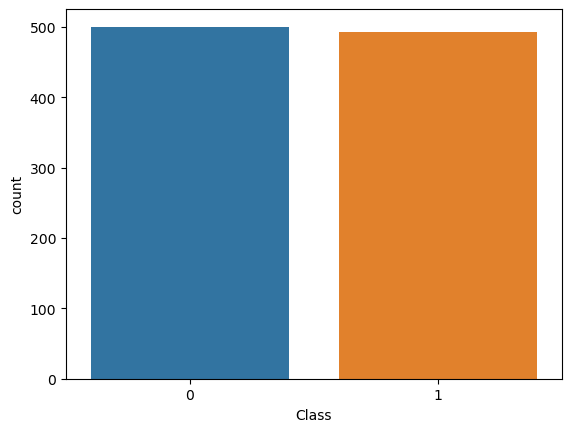

In [19]:
sns.countplot(x=df.Class)

<Axes: >

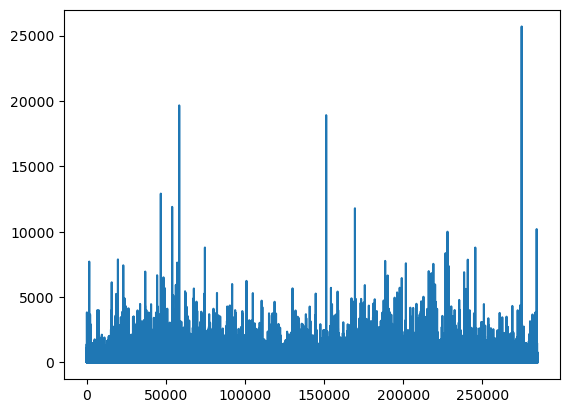

In [20]:
credit["Amount"].plot(kind="line")

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
credit["std_Amount"]=scaler.fit_transform((credit.Amount).values.reshape(-1,1))

In [24]:
credit.drop("Amount",axis=1,inplace=True)

In [25]:
credit.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475


In [26]:
y=df.Class
x=df.drop("Class",axis=1)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr=LogisticRegression()
lr.fit(x_train,y_train)

lr_train_pred=lr.predict(x_train)
lr_test_pred=lr.predict(x_test)


print(f"train_Accuracy={metrics.accuracy_score(lr_train_pred,y_train)}")
print(f"test_accuracy={metrics.accuracy_score(lr_test_pred,y_test)}")

train_Accuracy=0.9432534678436317
test_accuracy=0.9095477386934674


In [31]:
corr=metrics.confusion_matrix(lr_test_pred,y_test)

<Axes: >

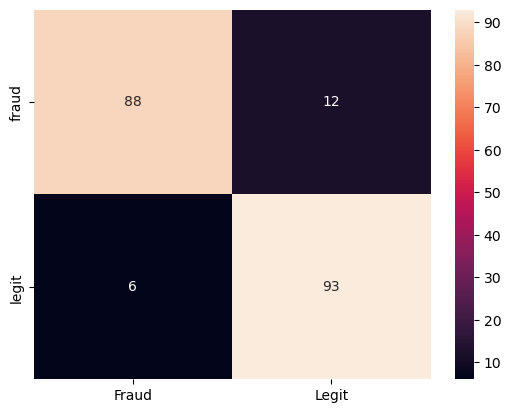

In [32]:
sns.heatmap(corr,annot=True,yticklabels=["fraud","legit"],xticklabels=["Fraud","Legit"])

In [33]:
print("Accuracy :",metrics.accuracy_score(y_test, lr_test_pred))
print("Precision :",metrics.precision_score(y_test, lr_test_pred))
print("Recall :",metrics.recall_score(y_test, lr_test_pred))
print("F1 Score :",metrics.f1_score(y_test, lr_test_pred))

Accuracy : 0.9095477386934674
Precision : 0.9393939393939394
Recall : 0.8857142857142857
F1 Score : 0.9117647058823529


In [34]:
#AUC score

y_pred_proba = lr.predict_proba(x_test)[::,1]
fp,tp,c= metrics.roc_curve(y_test,y_pred_proba)
auc_lr = metrics.roc_auc_score(y_test, y_pred_proba)
print(f"AUC LR :{auc_lr}")

AUC LR :0.9634245187436676


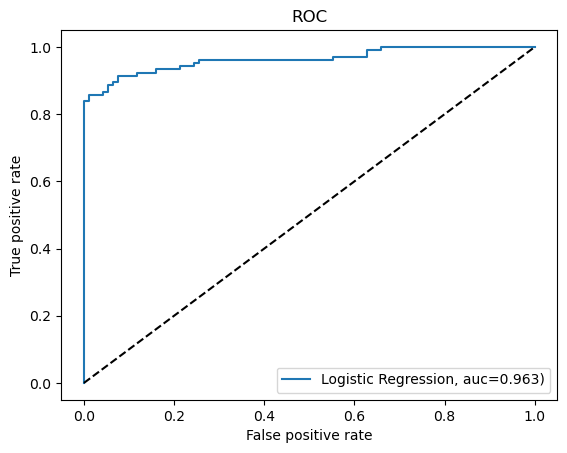

In [35]:
#ROC curve

plt.plot(fp,tp,label="Logistic Regression, auc={:.3f})".format(auc_lr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()